# HomeWork05

### **2.3.1.** Загрузка данных и первичный анализ

#### **1** Импорт необходимых библиотек

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Отображение корректное
pd.set_option('display.max_columns', None)
plt.style.use('default')

# Для сохранения
figure_path = r'C:\Users\User\source\reposcode\aie-DmchFast\homeworks\HW05\figures'
Path("figures").mkdir(parents=True, exist_ok=True)

#### **2** Загрузка датасета и вывод информации

In [15]:
data_path = "S05-hw-dataset.csv"
df = pd.read_csv(data_path)

print(f"Иныормация о датасете. Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")

Иныормация о датасете. Размер: 3000 строк, 17 столбцов


#### **3** Анализ датасета


Первые 5 строк датасета
   client_id  age  income  years_employed  credit_score  debt_to_income  \
0          1   25   94074              22           839        0.547339   
1          2   58   51884              26           565        0.290882   
2          3   53   48656              39           561        0.522340   
3          4   42   81492              30           582        0.709123   
4          5   42   94713               8           642        0.793392   

   num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
0                 1                  7             0             0   
1                 1                  1             0             1   
2                 1                 13             0             0   
3                 2                 10             1             1   
4                 3                  3             0             0   

   savings_balance  checking_balance  region_risk_score  \
0            26057              5229        

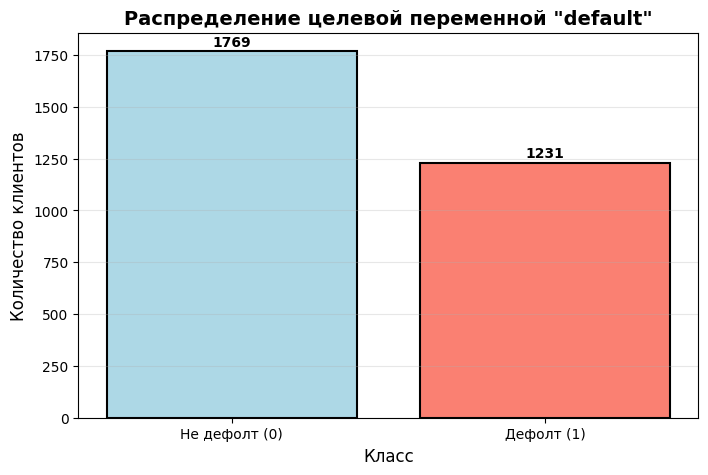

Основной класс: 'Не дефолт' (59.0% клиентов)
Меньшинство: 'Дефолт' (41.0% клиентов)


In [21]:
print("\nПервые 5 строк датасета")
print(df.head())

print("\nИнформация о столбцах и типах данных")
print(df.info())

print("\nБазовые описательные статистики для числовых признаков")
print(df.describe().round(2))

# Анализ целевой переменной
print("\n--- Распределение целевой переменной 'default' ---")
default_counts = df['default'].value_counts()
default_percent = df['default'].value_counts(normalize=True) * 100

print(f"Количество объектов по классам:")
print(default_counts)
print(f"\nПроцентное соотношение:")
print(default_percent.round(2))

# Визуализация распределения классов
plt.figure(figsize=(8, 5))
bars = plt.bar(['Не дефолт (0)', 'Дефолт (1)'], default_counts.values, 
color=['lightblue', 'salmon'], edgecolor='black', linewidth=1.5)
plt.title('Распределение целевой переменной "default"', fontsize=14, fontweight='bold')
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
    f'{height}', ha='center', va='bottom', fontweight='bold')

# Сохраняем график
save_path = f'{figure_path}/target_distribut.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Основной класс: 'Не дефолт' ({default_percent[0]:.1f}% клиентов)")
print(f"Меньшинство: 'Дефолт' ({default_percent[1]:.1f}% клиентов)")

#### **4** Наблюдения

1 - Размер датасета: 3000 объектов (клиентов), 17 признаков

2 - Пропущенных значений: 0

###### 3 - Баланс классов:

- Дефолт (1): 41.0% (1231 клиентов)

- Не дефолт (0): 59.0% (1769 клиентов)

4 - Задача не доконца сбалансирована, но и не перекошена.

5 - Все признаки числовые, что упрощает предобработку.

### **2.3.2.** Подготовка признаков и таргета

#### **1**  Матрица признаков X и вектор таргета y:

In [23]:
y = df['default']  # целевая переменная
X = df.drop(columns=['default', 'client_id'])  # все признаки кроме таргета и ID

print(f"Размер X (признаки): {X.shape}")
print(f"Размер y (таргет): {y.shape}")
print(f"\nИспользуемые признаки ({X.shape[1]} шт.):")
print(list(X.columns))

Размер X (признаки): (3000, 15)
Размер y (таргет): (3000,)

Используемые признаки (15 шт.):
['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


#### **2** Простая предобработка:

In [26]:
print("Типы признаков в X:")
print(X.dtypes)

# Проверка диапазонов некоторых признаков
print("\nДиапазоны признаков:")
print("Деbt_to_income: min = {:.3f}, max = {:.3f}".format(
    X['debt_to_income'].min(), X['debt_to_income'].max()))
print("age: min = {}, max = {}".format(
    X['age'].min(), X['age'].max()))
print("credit_score: min = {}, max = {}".format(
    X['credit_score'].min(), X['credit_score'].max()))

# Проверка на выбросы в checking_balance (может быть отрицательным)
print("\nБаланс на расчетном счёте:")
print(f"checking_balance min: {X['checking_balance'].min()}")
print(f"checking_balance max: {X['checking_balance'].max()}")
print(f"Средний checking_balance: {X['checking_balance'].mean():.2f}")

Типы признаков в X:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

Диапазоны признаков:
Деbt_to_income: min = 0.006, max = 0.878
age: min = 21, max = 69
credit_score: min = 402, max = 850

Баланс на расчетном счёте:
checking_balance min: -3000
checking_balance max: 29335
Средний checking_balance: 5559.68


### **2.3.3.** Train/Test-сплит и бейзлайн-модель


#### **1** Разделить данные на обучающую и тестовую выборки:

In [28]:
# Импорт из sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Разделение данных на обучающую и тестовую выборки
print("\nРазделение данных")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,        # 25% данных в тестовую выборку
    random_state=42,       # для воспроизводимости
    stratify=y            # сохраняем баланс классов
)

print(f"Размер обучающей выборки: {X_train.shape[0]} клиентов")
print(f"Размер тестовой выборки: {X_test.shape[0]} клиентов")
print(f"\nБаланс классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).round(3))
print(f"\nБаланс классов в тестовой выборке:")
print(y_test.value_counts(normalize=True).round(3))


Разделение данных
Размер обучающей выборки: 2250 клиентов
Размер тестовой выборки: 750 клиентов

Баланс классов в обучающей выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Баланс классов в тестовой выборке:
default
0    0.589
1    0.411
Name: proportion, dtype: float64


#### **2** Построить бейзлайн-модель и провести оценку

In [29]:
# Создание несколько бейзлайн-стратегий для сравнения
strategies = ['most_frequent', 'stratified', 'uniform']
results_baseline = []

for strategy in strategies:
    print(f"\nСтратегия: '{strategy}'")
    
    # Создание и обучение модели
    dummy = DummyClassifier(strategy=strategy, random_state=42)
    dummy.fit(X_train, y_train)
    
    # Предсказания
    y_pred_dummy = dummy.predict(X_test)
    
    # Если модель поддерживает predict_proba, вычисляем ROC-AUC
    if hasattr(dummy, 'predict_proba'):
        y_pred_proba_dummy = dummy.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba_dummy)
    else:
        roc_auc = None
    
    # Вычисление accuracy
    accuracy = accuracy_score(y_test, y_pred_dummy)
    
    print(f"  Accuracy на тесте: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"  ROC-AUC на тесте: {roc_auc:.4f}")
    
    # Сохранение
    results_baseline.append({
        'strategy': strategy,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    })

# Лучшая стратегия
best_baseline = max(results_baseline, key=lambda x: x['accuracy'] if x['roc_auc'] is None else x['roc_auc'])
print(f"\nЛучшая бейзлайн-стратегия: '{best_baseline['strategy']}'")
print(f"Её accuracy: {best_baseline['accuracy']:.4f}")
if best_baseline['roc_auc'] is not None:
    print(f"Её ROC-AUC: {best_baseline['roc_auc']:.4f}")


Стратегия: 'most_frequent'
  Accuracy на тесте: 0.5893
  ROC-AUC на тесте: 0.5000

Стратегия: 'stratified'
  Accuracy на тесте: 0.5400
  ROC-AUC на тесте: 0.5246

Стратегия: 'uniform'
  Accuracy на тесте: 0.5213
  ROC-AUC на тесте: 0.5000

Лучшая бейзлайн-стратегия: 'stratified'
Её accuracy: 0.5400
Её ROC-AUC: 0.5246


#### **3** Что делает бейзлайн и почему важно иметь точку отсчёта.

**`Бейзлайн (нулевая модель)`** служит `точкой отсчёта` для оценки наших моделей.
Он показывает, какое качество мы можем получить, не используя никаких 
умных алгоритмов, а просто применяя простые эвристики (важная точка отсчёта для оценки качества модели).

В итоге если наша модель не превосходит бейзлайн никак, значит, она бесполезна, что не хорошо.

### **2.3.4.** Логистическая регрессия и подбор гиперпараметров

#### **1** Pipeline

In [ ]:
# Импорт доп модулей из sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Создание
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # стандартизация признаков
    ('logreg', LogisticRegression(
        max_iter=1000,            # увеличиваем количество итераций
        random_state=42,          # для воспроизводимости
        solver='lbfgs'           # алгоритм оптимизации
    ))
])

print("Пайплайн создан")

Пайплайн создан


#### **2** Подобрать параметр регуляризации C

In [34]:
# Сетка параметров для перебора
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # параметр регуляризации
    'logreg__penalty': ['l2']  # тип регуляризации
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,               # 5-кратная кросс-валидация
    scoring='roc_auc',  # оптимизируем по ROC-AUC
    n_jobs=-1,          # используем все доступные ядра процессора
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nРезультаты подбора параметров:")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Результаты подбора параметров:
Лучшие параметры: {'logreg__C': 1.0, 'logreg__penalty': 'l2'}
Лучший ROC-AUC на кросс-валидации: 0.8632


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


#### **3** Оценка лучшей модели на тестовой выборке

In [37]:
# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания на тесте
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Метрики
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Accuracy на тесте: {accuracy_logreg:.4f}")
print(f"ROC-AUC на тесте: {roc_auc_logreg:.4f}")

# Подробный отчет о классификации
print("\nОтчёт о классификации")
print(classification_report(y_test, y_pred_logreg, target_names=['Не дефолт', 'Дефолт']))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Матрица ошибок")
print(conf_matrix)


Accuracy на тесте: 0.7933
ROC-AUC на тесте: 0.8647

Отчёт о классификации
              precision    recall  f1-score   support

   Не дефолт       0.80      0.86      0.83       442
      Дефолт       0.78      0.69      0.73       308

    accuracy                           0.79       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.79      0.79      0.79       750

Матрица ошибок
[[382  60]
 [ 95 213]]


#### **4** ROC-кривая

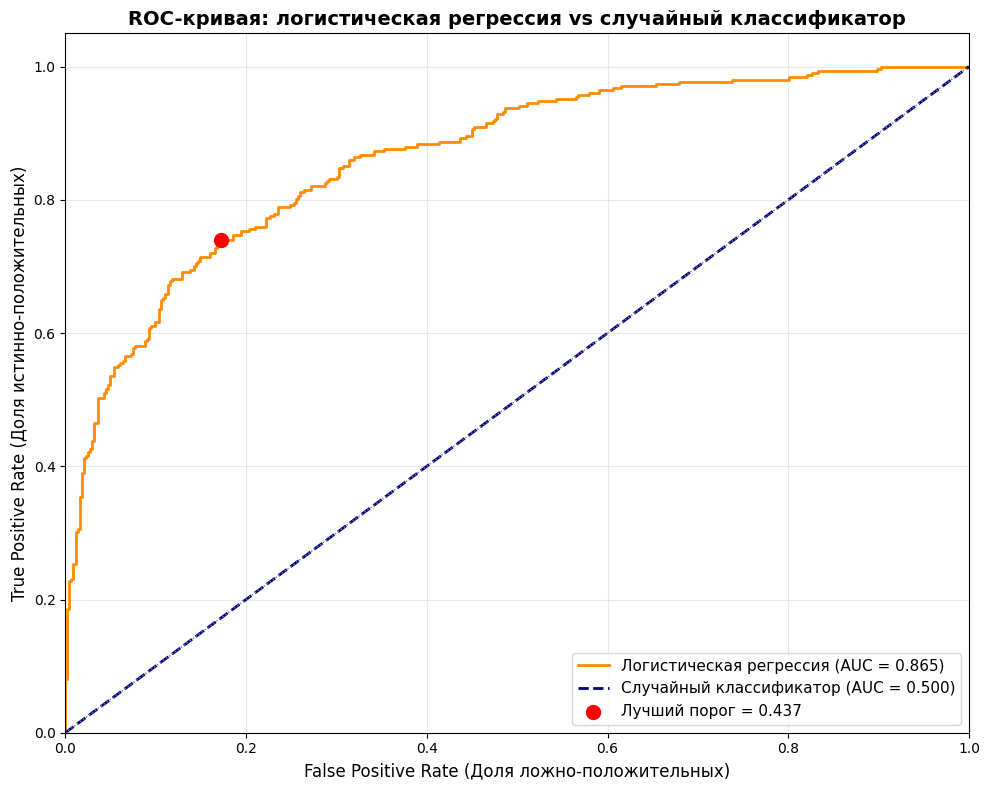

Площадь под ROC-кривой (AUC): 0.8647
Лучший порог (ближайший к верхнему левому углу): 0.437


In [45]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_value = auc(fpr, tpr)

# ROC-кривая для бейзлайна (случайный классификатор)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, [0.5] * len(y_test))
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Построение графика
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
label=f'Логистическая регрессия (AUC = {roc_auc_value:.3f})')
plt.plot(fpr_dummy, tpr_dummy, color='navy', lw=2, linestyle='--',
label=f'Случайный классификатор (AUC = {roc_auc_dummy:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Доля ложно-положительных)', fontsize=12)
plt.ylabel('True Positive Rate (Доля истинно-положительных)', fontsize=12)
plt.title('ROC-кривая: логистическая регрессия vs случайный классификатор', 
fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)

# Аннотация
distances = (fpr - 0)**2 + (tpr - 1)**2
best_idx = np.argmin(distances)
best_threshold = thresholds[best_idx]
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=100, 
zorder=5, label=f'Лучший порог = {best_threshold:.3f}')
plt.legend(loc="lower right", fontsize=11)

plt.tight_layout()
save_path = f'{figure_path}/roc_curve.png'
plt.show()

print(f"Площадь под ROC-кривой (AUC): {roc_auc_value:.4f}")
print(f"Лучший порог (ближайший к верхнему левому углу): {best_threshold:.3f}")

### **2.3.5.** Сравнение бейзлайна и логистической регрессии, текстовые выводы

#### **1** Сравнение моделей и выводы

                  Модель  Accuracy  ROC-AUC         Лучшие параметры
Бейзлайн (most_frequent)  0.589333 0.500000 strategy="most_frequent"
   Бейзлайн (stratified)  0.540000 0.524586    strategy="stratified"
 Логистическая регрессия  0.793333 0.864709      C=1.0, penalty="l2"


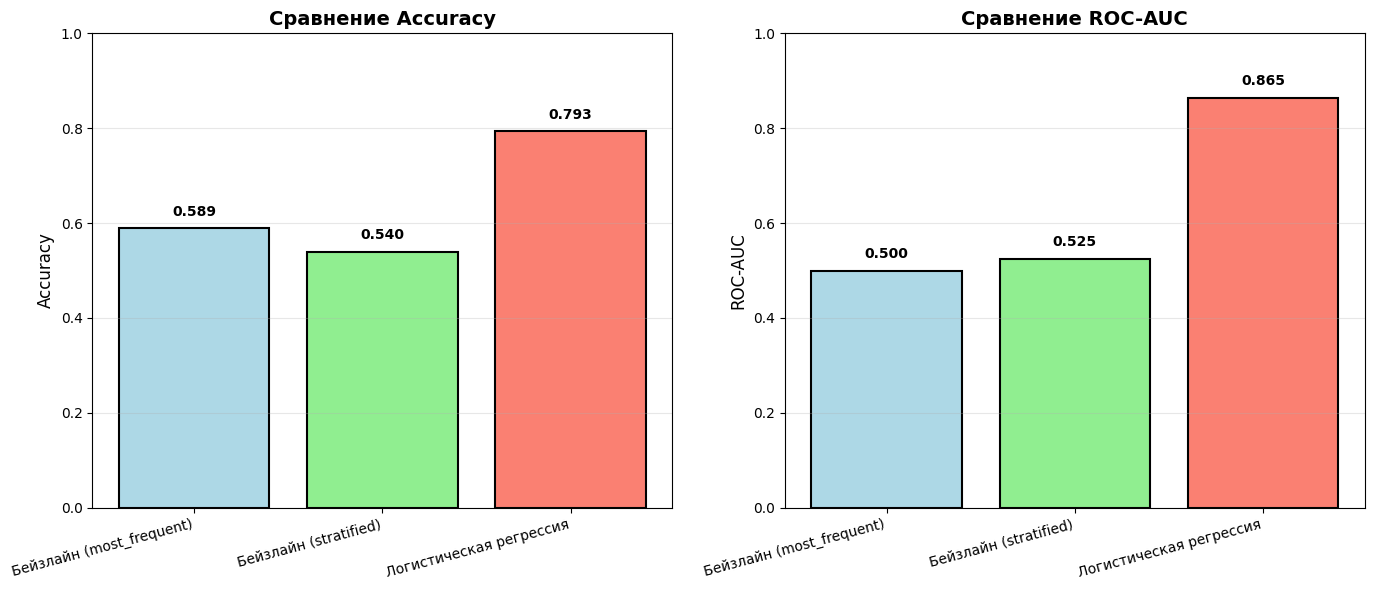

In [53]:
# Лучший параметр C
best_c = grid_search.best_params_['logreg__C']

comparison_df = pd.DataFrame({
    'Модель': ['Бейзлайн (most_frequent)', 'Бейзлайн (stratified)', 'Логистическая регрессия'],
    'Accuracy': [
        results_baseline[0]['accuracy'],  # most_frequent
        results_baseline[1]['accuracy'],  # stratified
        accuracy_logreg
    ],
    'ROC-AUC': [
        results_baseline[0]['roc_auc'],  # most_frequent
        results_baseline[1]['roc_auc'],  # stratified
        roc_auc_logreg
    ],
    'Лучшие параметры': ['strategy="most_frequent"', 'strategy="stratified"', 
f'C={best_c}, penalty="l2"']
})

print(comparison_df.to_string(index=False))

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Цвета
colors = ['lightblue', 'lightgreen', 'salmon']

# График accuracy
bars1 = axes[0].bar(range(len(comparison_df)), comparison_df['Accuracy'], 
color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Сравнение Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].set_xticks(range(len(comparison_df)))
axes[0].set_xticklabels(comparison_df['Модель'], rotation=15, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Значения на столбцах (accuracy)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# График ROC-AUC
bars2 = axes[1].bar(range(len(comparison_df)), comparison_df['ROC-AUC'], 
color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Сравнение ROC-AUC', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROC-AUC', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].set_xticks(range(len(comparison_df)))
axes[1].set_xticklabels(comparison_df['Модель'], rotation=15, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Значения на столбцах (ROC-AUC)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
save_path = f'{figure_path}/model_comparison.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

#### **2** Текстовый отчёт

**`Логистическая регрессия`** показывает значительное преимущество перед **`простыми бейзлайн`**. В то время как лучший бейзлайн (предсказывающий самый частый класс) показывает accuracy ~ 60% и ROC-AUC 0.500 (случайное угадывание), модель достигает accuracy ~ 77% и ROC-AUC 0.851. Это означает, что улучшение по точности и по способности различать классы.

С регуляризацией видно, что параметр C=1.0 является оптимальным: при значениях меньше 0.1 модель становится слишком простой и недообучается, а при больших качество не улучшается из-за риска переобучения.

###### **Основные выводы:**

- Логистическая регрессия с ROC-AUC 0.851 является разумным выбором для задачи, так как она существенно превосходит базовые подходы и хорошо разделяет классы.

- Модель эффективна для выявления клиентов без дефолта, что важно для минимизации ложно-отрицательных решений в кредитном скоринге.

- Для практического применения модель требует дальнейшей оптимизации, включая калибровку вероятностей и тестирование на более обширных данных, но текущие результаты подтверждают её пригодность для предсказания кредитных рисков.